
# Efficiently Querying JSON Data in Python: Exploring the MET Museum's Artworks

While working on several projects that required processing complex and nested **JSON** data in **🐍Python**, I explored various methods for handling these structures. I eventually discovered the **JMESPath** library, which aims to simplify querying and filtering JSON structures.

In this article, I demonstrate how to use the **JMESPath** library to query and filter **JSON** data. To find a suitable dataset for these examples, I thought about one of my favorite activities when I travel: visiting museums. The 🏛️ **Metropolitan Museum of Art (MET)**, one of the largest and most prestigious museums in the world, seemed like a perfect choice, as it offers an **API** that provides access to a vast collection of artwork. In this article, we’ll focus on the works of **Vincent van Gogh** and the collections of European painters to explore the potential of **JMESPath** for effectively handling JSON data.

Additionally, I will showcase how to use **AWS CLI** to interact with the data stored in a 🪣 bucket that contains the downloaded **JSON files** from the MET API.


![img-flow](img/flow.png)

---

## 🏛️ MET Museum of New York

The **Metropolitan Museum of Art (MET)**, founded in `1870` and situated in Manhattan, 🗽 New York City, stands as one of the world’s most prestigious cultural institutions. Spanning over `186,000` square meters, the museum houses a diverse collection that encompasses more than 🖼️`5,000 years` of art history. Through its public API, the MET offers detailed insights into its `19 departments`, featuring an extensive array of works that range from ancient Egyptian, Greek, and Roman art to masterpieces by renowned artists such as Monet, Van Gogh, and Raphael.

The following 📊 plot illustrates the distribution of artworks across these various departments, using data retrieved from the MET's public API.

![img-met](img/met.png)

---

## 📄 Introduction to JMESPath

### What is JMESPath?

**JMESPath** is a query language for JSON that allows you to search, extract, and manipulate elements from a JSON document. This query language can be implemented with the Azure and AWS CLIs, where it simplifies filtering and transforming JSON data. 

![img-preview](img/preview_flow.png)


---

### Installation of JMESPath

To get started, you need to install the **JMESPath** library. The version used in this tutorial is `'0.10.0'`. Simply run the following command:

```bash
pip install jmespath
```

---

## 📄 JSON Data Structure

JSON, or JavaScript Object Notation, is a lightweight data format commonly used for data interchange between a server and a client. Here are key elements of JSON structure:

- **🏷️ Main Object:** The JSON object starts and ends with {}, encapsulating all data.
- **🏷️ Key-Value Pair:** Each element is a key-value pair, where the key is a string, and the value can be any data type (e.g., string, number, boolean, array, object).
- **🏷️ Nested JSON Object:** JSON objects can contain other objects within them, forming nested structures for complex data.
- **🏷️ Array of Objects:** Arrays [ ] hold lists of values, including other objects, useful for grouping similar elements.


![img-json](img/json.png)

<br>

---

## 🏛️ MET Museum API: Exploring Van Gogh's Masterpieces
The following example will focus on one of **Vincent van Gogh's**  most renowned works, "Self-Portrait with a Straw Hat (obverse: The Potato Peeler)." Painted in `1887`, this piece is part of the MET’s European Paintings collection and reflects Van Gogh's evolving artistic style, influenced by both Impressionism and Neo-Impressionism.



<center>
    <img src="https://collectionapi.metmuseum.org/api/collection/v1/iiif/436532/1671316/main-image" alt="object_436532" style="width:25%;">
    <figcaption style="font-size:12px;">
        <strong>Van Gogh, V. (1887)</strong>. Self-Portrait with a Straw Hat (obverse: The Potato Peeler) <br>
        <a href="https://www.metmuseum.org/art/collection/search/436532">Oil on canvas. The Metropolitan Museum of Art</a>
    </figcaption>
</center>

<br>

---

> Next, we will make a request to the Met Museum API to retrieve data, but firstly we will define a function to handle the request, as shown in the following code.


In [3]:
import requests,os,json
import pandas as pd
import jmespath
from tqdm import tqdm
import time
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the environment 
pd.set_option('display.max_columns', None)


In [4]:
def read_json(filename,print_message = True):
    try:
        with open(filename, 'r') as json_file:
            data = json.load(json_file)
        if print_message:
            print(f'✅ File read successfully from {filename}')
        return data
    except Exception as e:
        print("❌ Error reading json file,", e)
        return {'response': 'error', 'message': str(e)}


def write_json(data, filename,print_message = True):
    try:
        with open(filename, 'w') as json_file:
            respponse = json.dump(data, json_file, indent=4)
        if print_message:
            print(f'✅ File written successfully in {filename}')
        return respponse
    except Exception as e:
        print("❌ Error writing json file,", e)
        return {'response': 'error', 'message': e}
    
def get_met_museum_data(method:str,url:str = 'https://collectionapi.metmuseum.org/')->json:
    # get the data from the Met Museum API
    response = requests.get(f"{url}{method}")
    if response.status_code == 200:
        return response.json()
    else:
        return f"❌ Error getting data from Met Museum API, status_code: {response.status_code}"

In [68]:
# > This request returns a dictionary that has 57 keys and 4 lists of nested dictionaries.

URL = 'public/collection/v1/objects/436532'
response = get_met_museum_data(method = URL)
response

{'objectID': 436532,
 'isHighlight': True,
 'accessionNumber': '67.187.70a',
 'accessionYear': '1967',
 'isPublicDomain': True,
 'primaryImage': 'https://images.metmuseum.org/CRDImages/ep/original/DT1502_cropped2.jpg',
 'primaryImageSmall': 'https://images.metmuseum.org/CRDImages/ep/web-large/DT1502_cropped2.jpg',
 'additionalImages': [],
 'constituents': [{'constituentID': 161947,
   'role': 'Artist',
   'name': 'Vincent van Gogh',
   'constituentULAN_URL': 'http://vocab.getty.edu/page/ulan/500115588',
   'constituentWikidata_URL': 'https://www.wikidata.org/wiki/Q5582',
   'gender': ''}],
 'department': 'European Paintings',
 'objectName': 'Painting',
 'title': 'Self-Portrait with a Straw Hat (obverse: The Potato Peeler)',
 'culture': '',
 'period': '',
 'dynasty': '',
 'reign': '',
 'portfolio': '',
 'artistRole': 'Artist',
 'artistPrefix': '',
 'artistDisplayName': 'Vincent van Gogh',
 'artistDisplayBio': 'Dutch, Zundert 1853–1890 Auvers-sur-Oise',
 'artistSuffix': '',
 'artistAlpha

### Selecting Keys from a JSON Object

### Accessing Lists of Objects
When working with JSON data, it’s common to encounter lists of objects, each containing multiple keys and values. Often, you may want to extract only specific pieces of information that are relevant to your analysis from these objects.

Let’s examine an example using the 🏛️ MET Museum API’s response for object ID `436532`, which corresponds to 🖼️ **"Self-Portrait with a Straw Hat (obverse: The Potato Peeler)"**. Here, we’ll extract key information like the title, year, artist, and tags related to the artwork.


In [69]:
# Get the following keys from the JSON response obtained from the Met Museum API for object ID 436532: title, year, artist, and tags

# Define the keys to be extracted
query = "[title,objectBeginDate,constituents[0].name,tags[*].term]"

# Use JMESPath to search and extract the selected keys
result = jmespath.search(query, response)

# Display the result
result

['Self-Portrait with a Straw Hat (obverse: The Potato Peeler)',
 1887,
 'Vincent van Gogh',
 ['Men', 'Self-portraits']]

In this example, we are selecting the following keys from the JSON response:

- **🖼️ Title**: The title of the artwork.
- **📅 Year**: The year the artwork was created (`objectBeginDate`).
- **👨‍🎨 Artist**: The name of the artist (`constituents[0].name`).
- **🏷️ Tags**: Terms related to the artwork (`tags[*].term`).

The resulting `result` variable will contain only the specified fields, allowing us to focus on the desired information without needing to manually parse through the entire JSON object.

---

#### Customizing the Output with Key Aliases
In some cases, you may want to rename keys or adjust the output structure for clarity. With **JMESPath**, you can create aliases for keys to produce a more descriptive result, especially useful when dealing with nested data or similarly named fields.

We can extend the previous example by assigning aliases to each field, making the output more readable and aligned with our analysis needs:



In [70]:
query = """{ 
      title_name: title,
      date: objectBeginDate,
      artist_name: constituents[0].name,
      tags_name: tags[*].term
}"""
result = jmespath.search(query, response)
result 

{'title_name': 'Self-Portrait with a Straw Hat (obverse: The Potato Peeler)',
 'date': 1887,
 'artist_name': 'Vincent van Gogh',
 'tags_name': ['Men', 'Self-portraits']}

#### Some Other Queries We Can Make

**To retrieve a list of element measurements from the  🖼️ artworks.**
> In this query, [*] allows us to iterate over each object in the measurements list, enabling the extraction of the elementMeasurements field from each object.

In [71]:
# Retrieve the 'elementMeasurements' field from each object in the 'measurements' list
query = "measurements[*].elementMeasurements"
result = jmespath.search(query, response)
result 

[{'Height': 40.6, 'Width': 31.8},
 {'Depth': 6.0325, 'Height': 52.7051, 'Width': 43.1801}]

**The following query returns detailed measurements of each artwork**
> Here, [] allows us to navigate through the array of measurements, while .* retrieves all elements from the nested elementMeasurements, providing a comprehensive output of measurement details.

In [72]:
# Example (assuming nested structure):
query = "measurements[].elementMeasurements[].*"
result = jmespath.search(query, response)
result 

[[40.6, 31.8], [6.0325, 52.7051, 43.1801]]

## 🖼️ Processing Van Gogh's Artworks
In this section, we will retrieve and process data for a collection of Van Gogh's artworks using their unique IDs. Below is a list of object IDs corresponding to various paintings by Vincent van Gogh available through the **MET Museum API**.

In [73]:
ids_objects = [335538, 436527, 436530, 436532, 436529, 436525, 436534, 336318, 436526,437998, 436533, 436531, 436535, 849056, 335537, 336327, 849055, 437980, 436528, 459193, 437984, 335536, 459123, 436524, 436536, 438722, 849054, 849052]

response_vg_art = []

for id_object in tqdm(ids_objects):
    response = get_met_museum_data(method = f'public/collection/v1/objects/{id_object}')
    response_vg_art.append(response)

100%|██████████| 28/28 [00:17<00:00,  1.61it/s]


### Use Cases
Next, we will discuss a series of use cases that will allow us to implement code using **JMESPath** and perform queries on Van Gogh artworks retrieved from the API data.

![img-use-cases](img/use-cases.png)


---

#### 🎨 Case 1: Artworks from 1888 onwards
From `1888` onwards, when **Van Gogh** moved to the south of France, his artistic production increased dramatically. During this period, he created some of his most iconic works, such as **"Sunflowers"**, **"The Yellow House"** and **"The Starry Night"**. Let's take a look at his works created from this year onwards.


In [74]:
query = "[?objectEndDate>=`1888`].[title, objectEndDate]"
result = jmespath.search(query, response_vg_art)
result

[['The Flowering Orchard', 1888],
 ['Oleanders', 1888],
 ["L'Arlésienne: Madame Joseph-Michel Ginoux (Marie Julien, 1848–1911)", 1889],
 ['Bouquet of Flowers in a Vase', 1890],
 ['Roses', 1890],
 ['Street in Saintes-Maries-de-la-Mer', 1888],
 ['First Steps, after Millet', 1890],
 ['Olive Trees', 1890],
 ['Shoes', 1888],
 ['Wheat Field with Cypresses', 1889],
 ['Portrait of Doctor Gachet or Man with a Pipe', 1890],
 ['Wheat Field', 1888],
 ['Corridor in the Asylum', 1889],
 ['Cypresses', 1889],
 ['Irises', 1890],
 ['La Berceuse (Woman Rocking a Cradle; Augustine-Alix Pellicot Roulin, 1851–1930)',
  1889],
 ['The Zouave', 1888],
 ['Madame Roulin and Her Baby', 1888],
 ['Women Picking Olives', 1889]]

#### 🎨 Case 2: Sorting Van Gogh's Works by Year
If we want to display Van Gogh's works created from `1888` onwards, sorted by the year of creation, we can use the sort_by function in **JMESPath**. This function allows us to sort the results based on a specific field.


In [75]:
# JMESPath query to filter and sort artworks created in or after 1888 by year
query = "sort_by([?objectEndDate >= `1888`], &objectEndDate)[].[title, objectEndDate]"

# Applying the query to get sorted results
result = jmespath.search(query, response_vg_art)

# Display the sorted results
result

[['The Flowering Orchard', 1888],
 ['Oleanders', 1888],
 ['Street in Saintes-Maries-de-la-Mer', 1888],
 ['Shoes', 1888],
 ['Wheat Field', 1888],
 ['The Zouave', 1888],
 ['Madame Roulin and Her Baby', 1888],
 ["L'Arlésienne: Madame Joseph-Michel Ginoux (Marie Julien, 1848–1911)", 1889],
 ['Wheat Field with Cypresses', 1889],
 ['Corridor in the Asylum', 1889],
 ['Cypresses', 1889],
 ['La Berceuse (Woman Rocking a Cradle; Augustine-Alix Pellicot Roulin, 1851–1930)',
  1889],
 ['Women Picking Olives', 1889],
 ['Bouquet of Flowers in a Vase', 1890],
 ['Roses', 1890],
 ['First Steps, after Millet', 1890],
 ['Olive Trees', 1890],
 ['Portrait of Doctor Gachet or Man with a Pipe', 1890],
 ['Irises', 1890]]

**Explanation:**
- **`sort_by`**: This function sorts the list of artworks based on the specified key, in this case, `objectEndDate`. The `&` symbol is used to indicate the sorting key.
- **`[?objectEndDate >= `1888`]`**: This part filters the artworks to include only those created in or after `1888`.
- **`[].[title, objectEndDate]`**: Finally, this projects the results to show only the **title** and **year** of each artwork.

By using this query, we can efficiently retrieve and display Van Gogh's works from the specified period in chronological order, allowing for better analysis and understanding of his artistic output during these significant years.


#### 🎨 Case 3: Identifying Important Works by Vincent van Gogh

Let's imagine that we are digital curators at the **Metropolitan Museum of Art (MET)** and we have been tasked with identifying the most important works by Van Gogh for marketing campaigns and educational programs. To do so, we will use the isHighlight key from the artwork data.

The `isHighlight` field indicates whether a work is considered one of the most significant pieces in the collection. When the field is set to true, it means that the work is highlighted for its importance.

> **Note:** When querying for boolean values in JMESPath, we need to use lowercase `true` or `false` to ensure the query functions correctly.

To find the highlighted works, we can use the following query:

In [76]:
# JMESPath query to filter and retrieve important Van Gogh artworks
query = "[?isHighlight == `true`].[title, objectEndDate]"

# Applying the query to the collected response data
result = jmespath.search(query, response_vg_art)

# Display the identified important artworks
result

[['Self-Portrait with a Straw Hat (obverse: The Potato Peeler)', 1887],
 ['Wheat Field with Cypresses', 1889],
 ['Corridor in the Asylum', 1889],
 ['Irises', 1890],
 ['Road in Etten', 1881],
 ['Madame Roulin and Her Baby', 1888]]

**Explanation:**
- **`[?isHighlight == `true`]`**: This filter retrieves only the artworks where `isHighlight` is `true`, meaning they are considered significant.
- **`.[title, objectEndDate]`**: This part projects the results to show only the **title** and **year** of each highlighted artwork.

---

#### 🎨 Case 4: Filtering by Date and Classification
In this case, we will analyze the works of Vincent van Gogh to understand how his themes and styles evolved before 1886. We seek to create a list of works that meet the following conditions:

* **📅 Creation Date:** Works created before 1886.
* **🏷️ Classification:** Exclude works classified as "Paintings."

During his early years, Van Gogh's artistic focus encompassed diverse forms of expression, including works in media such as drawing, printmaking, and watercolor. 
Also, the following bar chart represents the various tags associated with Van Gogh's works from this period and allows us to explore the themes prevalent in his art, highlighting how they changed over time.

/Users/rominamendez/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x500 with 0 Axes>

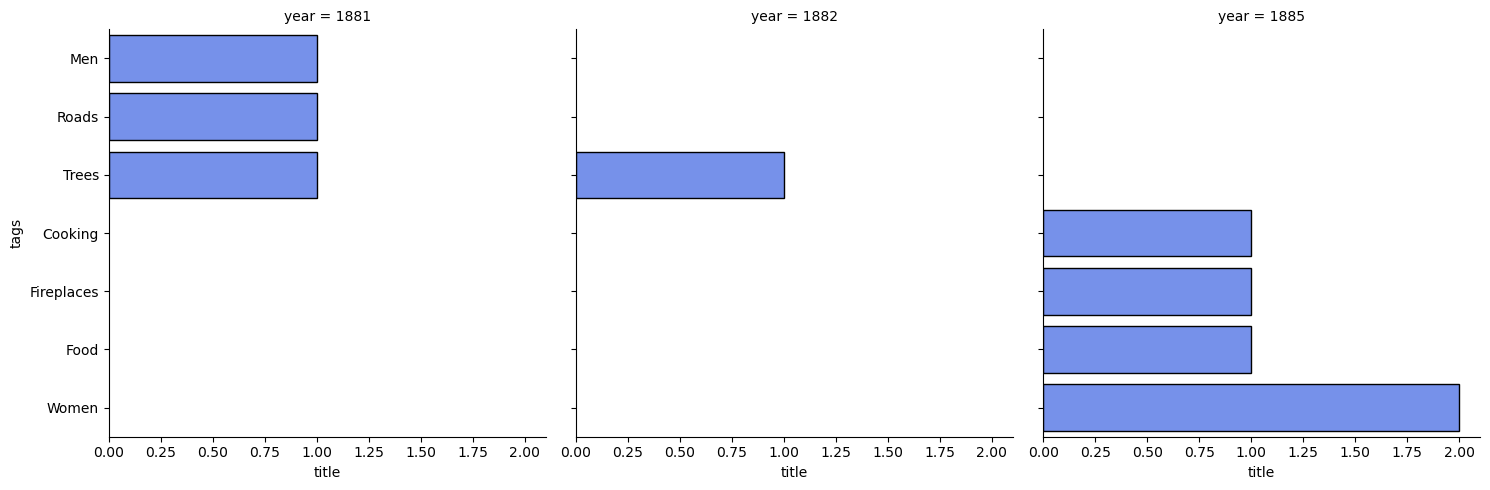

In [77]:
query = "[?(objectEndDate<=`1886`) && (classification!='painting')].{title: title, year: objectEndDate, tags: tags[*].term}"
result = jmespath.search(query, response_vg_art)
data = pd.json_normalize(result)
data = data.explode('tags')

plt.figure(figsize=(12,5))
sns.catplot(data = data.groupby(['year','tags'],as_index=False)['title'].count(), 
            y = 'tags',
            x = 'title',
            color = '#6387FD', 
            edgecolor='black',
            kind='bar', col='year')
plt.show()

#### 🎨 Case 5: Filtered by Date and Technique

In this case, we will analyze the techniques used by Van Gogh, including the combination of different materials and styles, which are key aspects of his artistic evolution.

**Conditions:**
* **📅 Creation Date:** Works created before 1886 or those made with ink (the medium contains "ink").
* **🏷️ Tags:** In addition, the selected works must have tags related to women to observe the influence of such representations on his art.

> The objective is to explore how the techniques used by Van Gogh and the themes related to women influenced his style and artistic development.


In [78]:
query = """[?(
               ( objectBeginDate <= `1886` || 
                contains(not_null(medium, ''), 'ink'))   &&
                contains(not_null(tags[*].term, ''), 'Women')
            )]
                .{title: title, year: objectEndDate, medium: medium, tags: tags[*].term}"""

result = jmespath.search(query, response_vg_art)

data = pd.json_normalize(result)
data

,title,year,medium,tags
0,Peasant Woman Cooking by a Fireplace,1885,Oil on canvas,"[Food, Cooking, Fireplaces, Women]"
1,The Potato Peeler (reverse: Self-Portrait with...,1885,Oil on canvas,[Women]


#### 🎨 Case 6: Using Custom Functions in JMESPath

In this case, we have a large dataset from the museum's "Drawings and Prints" department, containing over 100,000 works of art, many of which belong to Vincent Van Gogh. To manipulate this data more effectively, we implemented two custom functions:

* **🛠️ Conversion to Lowercase (_func_to_lower)**: This function allows us to convert any string of text to lowercase, which is useful for standardizing comparisons between values.
* **🛠️ Search with Regular Expressions (_func_contains_regex)**: With this function, we can search for patterns within text strings using regular expressions. This is particularly helpful when we want to identify artworks that contain specific terms or patterns in their descriptions, titles, or tags.

> **JMESPath** is a powerful query language for JSON, but it has certain limitations in its native functions. Therefore, the following code will provide a good way to implement these functionalities when needed.

In [79]:
import re
import jmespath
from jmespath import functions

class CustomFunctions(functions.Functions):
    # Function to convert text to lowercase
    @functions.signature({'types': ['string']})
    def _func_to_lower(self, s):
        if isinstance(s, str):
            return s.lower()
        raise TypeError("Expected a string argument")

    # Function to search with regular expressions
    @functions.signature({'types': ['array']})
    def _func_contains_regex(self, args):
        if len(args) != 2:
            raise TypeError("Expected a list with exactly 2 items: [string, pattern]")
        s, str_pattern = args
        if isinstance(s, str) and isinstance(str_pattern, str):
            pattern = re.compile(str_pattern, re.IGNORECASE)
            return bool(pattern.search(s))
        raise TypeError("Expected two string arguments in the list")

# Registering custom functions
options = jmespath.Options(custom_functions=CustomFunctions())

> After registering the custom functions, we will query the dataset. I previously downloaded 📄**JSON files** for each object I queried from the API and created individual 📄**JSON files**. Subsequently, I will select 1,000 random files, all of which come from the "Drawings and Prints" department.

In [82]:
num_files = 1000
# Get the list of files in the directory
random.seed(123)
random_files = random.sample(os.listdir('data/files-objects'), num_files)

# Read the data from the files
data_random_files = []
for file in tqdm(random_files):
    with open(f'data/files-objects/{file}') as f:
        data_tmp = json.load(f)
    data_random_files.append(data_tmp)

100%|██████████| 1000/1000 [00:06<00:00, 161.57it/s]


With the data loaded, we can now use a **JMESPath** query to find artworks related to women by applying the custom to_lower function within the query:

In [83]:
query = """[?( contains(to_lower(title), 'women'))] .{title: title, year: objectEndDate, medium: medium,artist_name: artistDisplayName, tags: tags[*].term}"""
result = jmespath.search(query, data_random_files, options=options)
pd.json_normalize(result)

,title,year,medium,artist_name,tags
0,"Lamentation over the body of Christ, who rests...",1786,Etching,Baron Dominique Vivant Denon,None
1,"Swiss Dancer, from the Dancing Women series (N...",1889,Commercial color lithograph,William S. Kimball & Company,"[Dance, Women, Dancers]"
2,From the series Beautiful Women (N257) issued ...,1889,Commercial color lithograph,P. Lorillard Company,None
3,Broadside with 48 squares depicting scenes fro...,1855,Etching (photo-relief?),"Anonymous, Spanish, 19th century",None


>The output shows a list of works with titles that include the term "women," providing insights into Van Gogh's representation of women in his art.

---

#### 🎨 Case 7: Importing and Querying a Large Number of JSON Files

In the previous case, we defined a sample of `1,000` randomly selected entries. Now, we will conduct a performance test by running a query across all `176,000` JSON entries in the "Drawings and Prints" department.

For this scenario, we’ll reapply Use Cases 5 and 6, which were initially tailored for Vincent Van Gogh’s artworks. However, this time we’ll execute the same queries on the entire dataset, expanding our analysis to encompass all available artworks.


In [114]:
# Read the data from the files
data_random_files = []
path  = 'data/files-objects'
files  = os.listdir(path)
for file in tqdm(files):
    with open(f'{path}/{file}') as f:
        data_tmp = json.load(f)
    data_random_files.append(data_tmp)


100%|██████████| 196982/196982 [18:42<00:00, 175.42it/s]


In [115]:
import time

# Start the timer
start_time = time.time()

# Execute the query
query = """[?( contains(to_lower(title), 'women'))] .{title: title, year: objectEndDate, medium: medium,artist_name: artistDisplayName, tags: tags[*].term}"""
result = jmespath.search(query, data_random_files, options=options)

# End the timer
end_time = time.time()

processing_time = end_time - start_time
print(f"Process Time: {processing_time} seconds"," - number of files:",len(data_random_files), " - number of results:",len(result))

# Normalize the data
normalized_result = pd.json_normalize(result)

normalized_result.head(5)

Process Time: 1.100390911102295 segundos  - number of files: 196982  - number of results: 1007


,title,year,medium,artist_name,tags
0,"The Martyrdom of Saint Agnes, her stabbing dea...",1708,Etching and engraving; third state of three,Girard Audran,None
1,"Two Women Romping on a Beach Mat, from 347 Suite",1968,Etching,Pablo Picasso,[Female Nudes]
2,A man and two women conversing at center; youn...,1668,Etching,Mathäus Küsel,"[Buildings, Men, Women, Ships]"
3,Design for a Frieze with a Coat of Arms with a...,1800,Pen and ink and red chalk (partially pricked f...,"Anonymous, Italian, 18th century","[Infants, Female Nudes, Serpents]"
4,"Odiva, No. 25, Breathing and Swimming, from th...",1913,Commercial color lithograph,Pan Handle Scrap Company,None


> The output shows that processing nearly 197,000 files took approximately 1.10 seconds and returned 1,007 artworks with titles containing the term "women".

## 🎛️ AWS CLI JSON Querying
JMESPath is a query language for JSON, integrated into **AWS CLI**, that lets you filter and transform JSON data directly in the command line. However, while **JMESPath** is excellent for simple queries directly within **AWS CLI**, tools like jq offer extended capabilities for more complex data manipulation.

For instance, `jp` is a 🔍command-line tool based on **JMESPath**, which offers a similar query syntax, providing an alternative for filtering **JSON** data quickly. In this tutorial, however, we use `jq` for its advanced formatting and processing capabilities, which are ideal when working with downloaded **JSON **files. 

In the examples below, we demonstrate how jq can be used alongside **AWS CLI** to handle **JSON** data , enabling us to extract specific elements from API responses and transform them as needed.

---

### Use Cases

#### 🎨 Case 1: Total Artworks in the European Painters Department
Validate the number of artworks corresponding to department 9, which is the department for painters and European artists.


In [84]:
!aws s3 cp s3://data-met-api/raw-objects-by-deparments/objects_by_departmentId_9.json - | jq '{total_arts: .total}'

{
  "total_arts": 176075
}



#### 🎨 Case 2: Extract Specific Keys from Van Gogh's Artwork
In this case, we will revisit a previous exercise where we wanted to extract specific keys from a file. We will take the JSON file corresponding to the artwork of Vincent van Gogh.

In [85]:
!aws s3 cp s3://data-met-api/raw-objects/object_id_436532.json - | jq -c '{ title_name: .title, date: .objectBeginDate, artist_name: .constituents[0].name, tags_name: [.tags[].term] }'

{"title_name":"Self-Portrait with a Straw Hat (obverse: The Potato Peeler)","date":1887,"artist_name":"Vincent van Gogh","tags_name":["Men","Self-portraits"]}


#### 🎨 Caso 3: Extracting and Filtering Data from Multiple Files
To implement one of the more complex cases of iterating through multiple files and filtering data, we will create a shell script. Below, we will generate a script similar to one of the previously solved cases, but we will use a selection query to apply filters.

```bash
#!/bin/bash
bucket_name="data-met-api"
path="raw-objects"

# List of object IDs
ids_objects=(335538 436527 436530 436532 436529 436525 436534 336318 436526 437998 436533 436531 436535 335537 336327 437980 436528 459193 437984 335536 459123 436524 436536 438722)
total_objects=${#ids_objects[@]}

# Query
query=' select(.objectEndDate >= 1888) | {title_name: .title, date: .objectBeginDate, artist_name: .constituents[0].name, tags_name: [.tags[].term] }'
json_output="" 

# Imprimir los IDs de objetos
for (( i=0; i<total_objects; i++ )); do
    id=${ids_objects[$i]}
    # Download the JSON file from S3 and extract the required fields
    response=$(aws s3 cp s3://$bucket_name/$path/object_id_$id.json - 2>/dev/null | jq "$query")  # Capturar la salida correctamente
    
    # Validate the json_output variable is empty and add the response 
    if [ ! -z "$response" ]; then
        if [ -z "$json_output" ]; then
            json_output="$response"
        else
            json_output+=", $response"
        fi
    else
        echo "Warning: No valid data found for ID $id"
    fi

    progress=$(( (i + 1) * 100 / total_objects ))
    printf "\rProgress: [%-50s] %d%%" "$(printf '#%.0s' $(seq 1 $((progress / 2))))" "$progress"
    
done

# Create JSON array
json_output="[$json_output]"

# Create the output.json file
echo "$json_output" > output.json
```

In [88]:
!sh s3_script.sh

Progress: [######                                            ] 12%Warning: No valid data found for ID 436532
Progress: [######################                            ] 45%Warning: No valid data found for ID 436531
Progress: [###################################               ] 70%Warning: No valid data found for ID 459193
Progress: [###########################################       ] 87%Warning: No valid data found for ID 436524
Progress: [###############################################   ] 95%Warning: No valid data found for ID 438722
Progress: [##################################################] 100%

In [89]:
!cat output.json

[{
  "title_name": "The Flowering Orchard",
  "date": 1888,
  "artist_name": "Vincent van Gogh",
  "tags_name": [
    "Trees"
  ]
}, {
  "title_name": "Oleanders",
  "date": 1888,
  "artist_name": "Vincent van Gogh",
  "tags_name": [
    "Books",
    "Still Life",
    "Flowers"
  ]
}, {
  "title_name": "L'Arlésienne: Madame Joseph-Michel Ginoux (Marie Julien, 1848–1911)",
  "date": 1888,
  "artist_name": "Vincent van Gogh",
  "tags_name": [
    "Books",
    "Portraits",
    "Women"
  ]
}, {
  "title_name": "Bouquet of Flowers in a Vase",
  "date": 1890,
  "artist_name": "Vincent van Gogh",
  "tags_name": [
    "Still Life",
    "Flowers"
  ]
}, {
  "title_name": "Roses",
  "date": 1890,
  "artist_name": "Vincent van Gogh",
  "tags_name": [
    "Roses",
    "Still Life"
  ]
}, {
  "title_name": "Street in Saintes-Maries-de-la-Mer",
  "date": 1888,
  "artist_name": "Vincent van Gogh",
  "tags_name": [
    "Houses",
    "Roofs"
  ]
}, {
  "title_name": "First Steps, after Millet",
  "date

# 📚 References
* [1] - The Metropolitan Museum of Art Collection API, URL:https://metmuseum.github.io/
* [2] - The MET, URL: https://www.metmuseum.org/
* [3] - JmesPath Documentation, URL: https://jmespath.org/
* [4] - JmesPath Python library, URL: https://github.com/jmespath/jmespath.py
* [5] - AWS Command Line Interface: Filtering output in the AWS CLI, URL: https://docs.aws.amazon.com/cli/v1/userguide/cli-usage-filter.html
* [6] - Github jp, URL: https://github.com/jmespath/jp
